# Importações


In [ ]:
import torch

# Camadas e funções de redes neurais (Linear, Conv2d, ReLU)
import torch.nn as nn
import torch.nn.functional as F

# Otimizador que atualizam os pesos SGD(descida do gradiente) Adam(mais avançado)
# Os otimizadores da rede ajustam os pesos após cada erro
import torch.optim as optim

# Ferramentas para visão computacional
import torchvision

# Transformações aplicadas nas imagens, como: Girar, normalizar, inverter
import torchvision.transforms as transforms

# Fica os datasets
import torchvision.datasets as datasets

from torchvision.datasets import ImageFolder

# Ferramentas para manipular os dados
# DataLoader: Entrega os dados em mini-batches
# random_split: divide em treino/teste de forma aleatória
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt

import os

import random

import shutil

## Inicializando a GPU

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


# Organizando as pastas

Quero organizar assim <br>

dataset/ <br>
├── treino/ <br>
│   ├── gato/ <br>
│   └── cachorro/ <br>
├── teste/ <br>
│   ├── gato/ <br> 
│   └── cachorro/ <br>


In [7]:
# Configurações
caminho_gatos = '../../../../../../Downloads/archive/PetImages/Cat'
caminho_cachorros = '../../../../../../Downloads/archive/PetImages/Dog'
destino_base = '../../../../../../Downloads/archive/dataset'
proporcao_treino = 0.8

# Cria pastas destino
for modo in ['treino', 'teste']:
    for classe in ['gato', 'cachorro']:
        path = os.path.join(destino_base, modo, classe)
        os.makedirs(path, exist_ok=True)

# Função para separar e copiar arquivos
def copiar_arquivos(origem, classe):
    arquivos = os.listdir(origem)
    random.shuffle(arquivos)
    for arquivo in arquivos:
        caminho_origem = os.path.join(origem, arquivo)
        if random.random() < proporcao_treino:
            destino = os.path.join(destino_base, 'treino', classe, arquivo)
        else:
            destino = os.path.join(destino_base, 'teste', classe, arquivo)
        shutil.copy(caminho_origem, destino)

# Executa para gatos e cachorros
copiar_arquivos(caminho_gatos, 'gato')
copiar_arquivos(caminho_cachorros, 'cachorro')

# Carregando os dados com ImageFolder e aplicando Transformações

In [3]:
transformacoes = transforms.Compose([
  transforms.Resize((128, 128)), # Redimensiona todas as imagens para 128x128
  transforms.ToTensor(), # Converte imagem para tensor (0.0a 1.0)
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normaliza para -1 a 1
])

## Carregar com ImageFolder

In [5]:
# Caminhos das pastas
caminho_treino = '../../../../../../Downloads/archive/dataset/treino'
caminho_teste = '../../../../../../Downloads/archive/dataset/teste'

# Carrega os datasets
dataset_treino = ImageFolder(root=caminho_treino, transform=transformacoes)
dataset_teste = ImageFolder(root=caminho_teste, transform=transformacoes)

# Cria os DataLoaders
loader_treino = DataLoader(dataset_treino, batch_size=32, shuffle=True)
loader_treino = DataLoader(dataset_teste, batch_size=32, shuffle=False)

## Verificando se está carregando certo

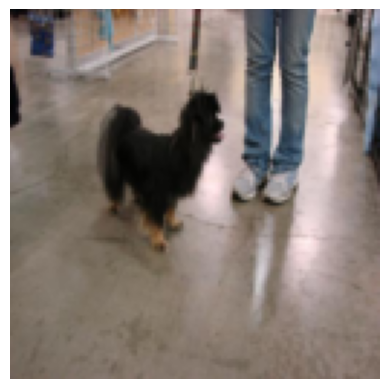

Classe: cachorro


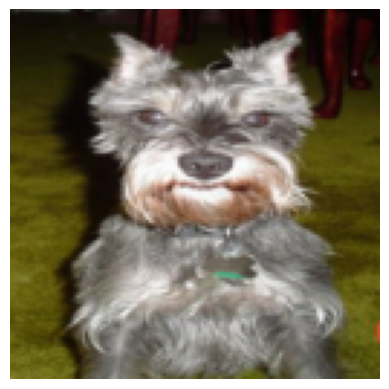

Classe: cachorro


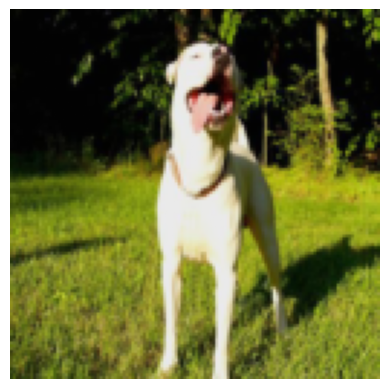

Classe: cachorro


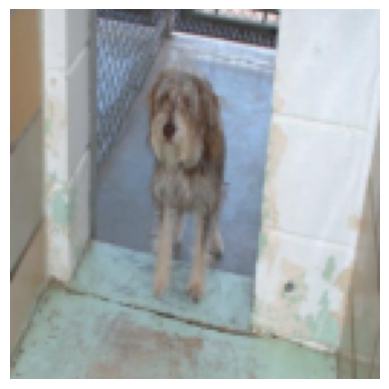

Classe: cachorro


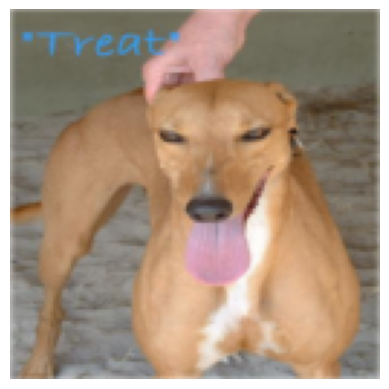

Classe: cachorro


In [7]:
# Função para desnormalizar imagem e mostrar
def imshow(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))  # CxHxW → HxWxC
    img = img * 0.5 + 0.5  # desfaz a normalização
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Pega um mini-batch do loader
dados = next(iter(loader_treino))
imagens, rotulos = dados

# Mostra as primeiras 4 imagens com rótulo
for i in range(5):
    imshow(imagens[i])
    print("Classe:", dataset_treino.classes[rotulos[i]])